# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_excel('train.xlsx')

In [ ]:
dataset_train.head(1)

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-01-30,4126.75,4126.75,4126.75,4126.75,NaN,-0.0067


In [ ]:
dataset_train.drop(['Vol.'], axis = 1, inplace = True)

In [ ]:
dataset_train.head

<bound method NDFrame.head of            Date    Price     Open     High      Low  Change %
0    2013-01-30  4126.75  4126.75  4126.75  4126.75   -0.0067
1    2013-01-31  4136.30  4136.30  4136.30  4136.30    0.0023
2    2013-02-03  4163.82  4163.82  4163.82  4163.82    0.0067
3    2013-02-04  4164.62  4164.62  4164.62  4164.62    0.0002
4    2013-02-05  4191.50  4191.50  4191.50  4191.50    0.0065
...         ...      ...      ...      ...      ...       ...
2316 2022-11-24  6215.12  6215.12  6215.12  6215.12    0.0012
2317 2022-11-28  6197.94  6197.94  6197.94  6197.94   -0.0028
2318 2022-11-29  6212.46  6212.46  6212.46  6212.46    0.0023
2319 2022-11-30  6235.95  6235.95  6235.95  6235.95    0.0038
2320 2022-12-01  6245.38  6245.38  6245.38  6245.38    0.0015

[2321 rows x 6 columns]>

In [ ]:
dataset_train.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Change %           float64
dtype: object

In [ ]:
training_set = dataset_train.iloc[:, 2:3].values

## NEURAL NETWORKS ONLY WORK WITH NUMPY ARRAYS

In [ ]:
print(training_set)

[[4126.75]
 [4136.3 ]
 [4163.82]
 ...
 [6212.46]
 [6235.95]
 [6245.38]]


In [ ]:
print(len(training_set))

2321


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))  ##normalization##
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
print(len(training_set_scaled))

2321


### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
## 60 = how many ovservation for next day preddiction
## 1258 = last index of training set
for i in range (60, 2321):
    X_train.append(training_set_scaled[i-60:i, 0]) ## i-60:i = rows, 0=column  [upper bound excluded]
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  #convert to numpy arrays from lists

### Reshaping

np.reshape

          (
    the array we want to reshape, (the new dimensions= batch size, timesteps, indicators)  
          )

X_train.shape[0] means all observations/indices/rows of the training set

X_train.shape[1] means all timesteps/columns of the training set

1 = number of indicators

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

LSTM
      
      (
      units = NEURONS/LSTM cells
      return_sequences = true when we will add a next lstm layer
      input_shape = (Timesteps, Indicators) for first layer only
      )

In [ ]:
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
print(X_train.shape)

(2261, 60, 1)


In [ ]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
71/71 [==============================] - 13s 101ms/step - loss: 0.0189
Epoch 2/50
71/71 [==============================] - 7s 100ms/step - loss: 0.0043
Epoch 3/50
71/71 [==============================] - 7s 100ms/step - loss: 0.0040
Epoch 4/50
71/71 [==============================] - 7s 101ms/step - loss: 0.0033
Epoch 5/50
71/71 [==============================] - 7s 100ms/step - loss: 0.0031
Epoch 6/50
71/71 [==============================] - 8s 114ms/step - loss: 0.0034
Epoch 7/50
71/71 [==============================] - 7s 103ms/step - loss: 0.0031
Epoch 8/50
71/71 [==============================] - 7s 102ms/step - loss: 0.0029
Epoch 9/50
71/71 [==============================] - 7s 102ms/step - loss: 0.0025
Epoch 10/50
71/71 [==============================] - 7s 99ms/step - loss: 0.0027
Epoch 11/50
71/71 [==============================] - 7s 102ms/step - loss: 0.0025
Epoch 12/50
71/71 [==============================] - 7s 101ms/step - loss: 0.0024
Epoch 13/50
71/71 [======

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_excel('test.xlsx')
dataset_test.drop(['Vol.'], axis = 1, inplace = True)
real_stock_price = dataset_test.iloc[:, 2:3].values

In [ ]:
print(len(dataset_test))

20


In [ ]:
print(dataset_test)

         Date    Price     Open     High      Low  Change %
0  2022-12-05  6212.55  6212.55  6212.55  6212.55   -0.0053
1  2022-12-06  6229.01  6229.01  6229.01  6229.01    0.0026
2  2022-12-07  6233.68  6233.68  6233.68  6233.68    0.0007
3  2022-12-08  6227.82  6227.82  6227.82  6227.82   -0.0009
4  2022-12-12  6266.96  6266.96  6266.96  6266.96    0.0063
5  2022-12-13  6271.41  6271.41  6271.41  6271.41    0.0007
6  2022-12-14  6260.77  6260.77  6260.77  6260.77   -0.0017
7  2022-12-15  6256.83  6256.83  6256.83  6256.83   -0.0006
8  2022-12-19  6238.99  6238.99  6238.99  6238.99   -0.0029
9  2022-12-20  6226.50  6226.50  6226.50  6226.50   -0.0020
10 2022-12-21  6198.82  6198.82  6198.82  6198.82   -0.0044
11 2022-12-22  6202.21  6202.21  6202.21  6202.21    0.0005
12 2022-12-26  6189.70  6189.70  6189.70  6189.70   -0.0020
13 2022-12-27  6180.27  6180.27  6180.27  6180.27   -0.0015
14 2022-12-28  6195.82  6195.82  6195.82  6195.82    0.0025
15 2022-12-29  6206.81  6206.81  6206.81

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 38ms/step


In [ ]:
print(X_test)

### Visualising the results

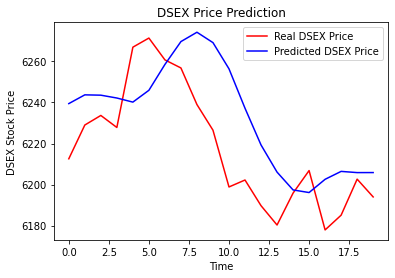

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real DSEX Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted DSEX Price')
plt.title('DSEX Price Prediction')
plt.xlabel('Time')
plt.ylabel('DSEX Stock Price')
plt.legend()
plt.show()